<a href="https://colab.research.google.com/github/anava92/Deep-Learning-VGG16/blob/main/FinalTaskAndromeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINI PROJECT - DATA ANALYSIS

> ### Objective:
> - To showcase proficiency in data cleaning techniques and exploratory data analysis.
>
> ### Dataset:
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### Background

Melbourne's housing market is currently in the midst of a bubble, with some experts warning that it may burst in the near future. Exploring this situation, it would be valuable to identify any discernible trends. Which suburbs offer the best prospects for buyers? Where can you find good value for money? Which areas are considered the pricier side of town? And most importantly, where would be the ideal location to purchase a 2-bedroom unit?

### Contents and Acknowledgements
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid.

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### Data Dictionary and Key Details

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

## Data Cleaning

### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

### Import Dataset

In [6]:
df_melbourne = pd.read_csv("Melbourne_Housing.csv")
df_melbourne

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [7]:
#check the number of rows and columns
df_melbourne.shape

(13580, 21)

In [8]:
#Check Data Type
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [9]:
# Rename Column RegionName and PropertyCount
df_melbourne = df_melbourne.rename(columns={"Regionname" : "RegionName","Propertycount" : "PropertyCount"})

## Data Cleaning - Handling Duplicate

In [10]:
#Handling Duplicate
df_melbourne.drop_duplicates(keep='first', inplace = True)
df_melbourne.shape

(13580, 21)

## Data Cleaning - Handling Incosistent Formating

---



In [11]:
#check inconsistent formatting in column seller G
df_melbourne['SellerG'].head(20)

0      Biggin
1      Biggin
2      Biggin
3      Biggin
4      Nelson
5      Jellis
6      Nelson
7      Nelson
8      Biggin
9      Biggin
10     Jellis
11     Nelson
12     Biggin
13     Biggin
14       Greg
15     Jellis
16     Jellis
17     LITTLE
18    Collins
19     Biggin
Name: SellerG, dtype: object

In [12]:
df_melbourne['SellerG'] = df_melbourne['SellerG'].str.upper()
df_melbourne['SellerG'].head(20)

0      BIGGIN
1      BIGGIN
2      BIGGIN
3      BIGGIN
4      NELSON
5      JELLIS
6      NELSON
7      NELSON
8      BIGGIN
9      BIGGIN
10     JELLIS
11     NELSON
12     BIGGIN
13     BIGGIN
14       GREG
15     JELLIS
16     JELLIS
17     LITTLE
18    COLLINS
19     BIGGIN
Name: SellerG, dtype: object

## Data Cleaning - Handling Missing Value

In [13]:
#cek mising values
df_melbourne.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
RegionName          0
PropertyCount       0
dtype: int64

In [14]:
# cek jumlah baris dan column
df_melbourne.shape

(13580, 21)

In [15]:
# List Column with Missing Value
nama_kolom = ['BuildingArea', 'YearBuilt', 'CouncilArea']

# Delete columns
df_melbourne = df_melbourne.drop(columns=nama_kolom)
df_melbourne.shape

(13580, 18)

In [16]:
df_melbourne

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,RegionName,PropertyCount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,BIGGIN,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,BIGGIN,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,BIGGIN,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,BIGGIN,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,NELSON,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,BARRY,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,WILLIAMS,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,RAINE,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,SWEENEY,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [17]:
#Check for rows that have null values
rows_with_null = df_melbourne.isnull().any(axis=1)

# Delete rows with null values
df_melbourne = df_melbourne[~rows_with_null]

In [18]:
#cek mising values
df_melbourne.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
RegionName       0
PropertyCount    0
dtype: int64

## Data Cleaning- Detecting and Handling Outliers

<Axes: xlabel='Price'>

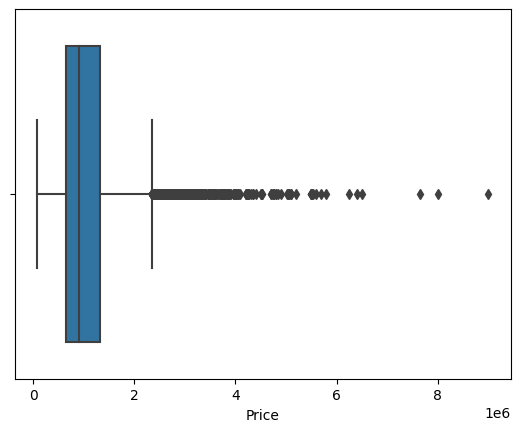

In [19]:
sns.boxplot(x=df_melbourne['Price'])

In [20]:
#Quartile
Q1 = df_melbourne['Price'].quantile(0.25)
Q3 = df_melbourne['Price'].quantile(0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)

#IQR
IQR = Q3 - Q1
print('IQR = ', IQR)

#Lower Limit and Upper Limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit = ', lower_limit)
print('Upper Limit = ', upper_limit)

Q1 =  650000.0
Q3 =  1328000.0
IQR =  678000.0
Lower Limit =  -367000.0
Upper Limit =  2345000.0


In [21]:
#Check the data that are considered outliers
df_outlier = df_melbourne[(df_melbourne['Price'] < lower_limit) | (df_melbourne['Price'] > upper_limit )]
df_outlier.Price

80       2850000.0
92       2615000.0
97       2575000.0
102      3010000.0
103      2800000.0
           ...    
13521    2455000.0
13523    2668000.0
13553    2720000.0
13555    3100000.0
13578    2500000.0
Name: Price, Length: 621, dtype: float64

<Axes: xlabel='Rooms'>

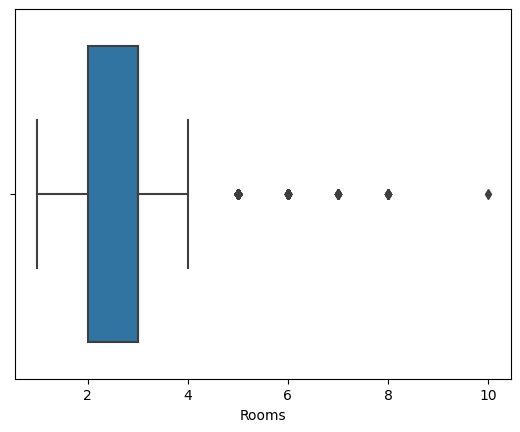

In [23]:
sns.boxplot(x=df_melbourne['Rooms'])

In [24]:
#Quartile
Q1 = df_melbourne['Rooms'].quantile(0.25)
Q3 = df_melbourne['Rooms'].quantile(0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)

#IQR
IQR = Q3 - Q1
print('IQR = ', IQR)

#Lower limit dan upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit = ', lower_limit)
print('Upper Limit = ', upper_limit)

Q1 =  2.0
Q3 =  3.0
IQR =  1.0
Lower Limit =  0.5
Upper Limit =  4.5


In [25]:
#Check the data that are considered outliers
df_outlier = df_melbourne[(df_melbourne['Rooms'] < lower_limit) | (df_melbourne['Rooms'] > upper_limit )]
df_outlier

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,RegionName,PropertyCount
47,Airport West,11 Harrington Rd,6,h,725000.0,SP,BARRY,7/05/2016,13.5,3042.0,6.0,3.0,2.0,976.0,-37.72390,144.87350,Western Metropolitan,3464.0
55,Airport West,241 Parer Rd,5,h,755000.0,PI,PROPERTYAU,14/05/2016,13.5,3042.0,3.0,2.0,2.0,596.0,-37.72480,144.86990,Western Metropolitan,3464.0
93,Albert Park,23 Finlay St,5,h,2100000.0,S,GREG,10/12/2016,3.3,3206.0,5.0,2.0,1.0,237.0,-37.84360,144.95570,Southern Metropolitan,3280.0
124,Alphington,83 Fulham Rd,5,h,2840000.0,S,NELSON,12/06/2016,6.4,3078.0,5.0,4.0,4.0,809.0,-37.77500,145.02680,Northern Metropolitan,2211.0
142,Altona,59 Bracken Gr,5,h,1525000.0,S,GREG,3/12/2016,13.8,3018.0,5.0,3.0,3.0,729.0,-37.87210,144.81050,Western Metropolitan,5301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13468,Kew,16 Hodgson St,5,h,3450000.0,PI,KAY,26/08/2017,5.4,3101.0,5.0,2.0,2.0,668.0,-37.80795,145.01474,Southern Metropolitan,10331.0
13487,Melton,21D Yuille St,5,h,710000.0,PI,RYDER,26/08/2017,31.7,3337.0,5.0,2.0,2.0,1670.0,-37.67813,144.59292,Western Victoria,3600.0
13503,Mount Waverley,17 Huntingtower Cr,6,h,1840000.0,S,JELLIS,26/08/2017,14.2,3149.0,6.0,2.0,2.0,554.0,-37.87591,145.13958,Eastern Metropolitan,13366.0
13560,Templestowe Lower,50 Caroline Dr,5,h,1400000.0,S,BARRY,26/08/2017,12.4,3107.0,5.0,3.0,2.0,717.0,-37.76630,145.11320,Eastern Metropolitan,5420.0


<Axes: xlabel='Bedroom2'>

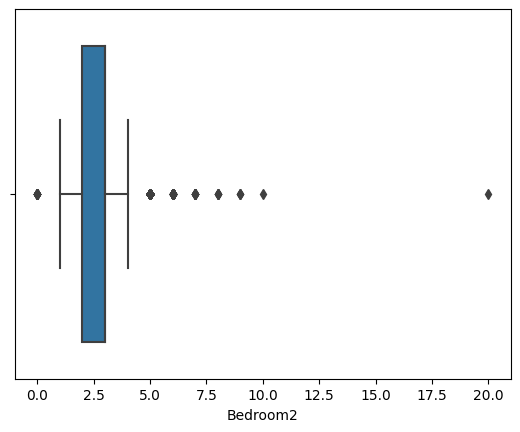

In [27]:
sns.boxplot(x=df_melbourne['Bedroom2'])

In [28]:
#Quartile
Q1 = df_melbourne['Bedroom2'].quantile(0.25)
Q3 = df_melbourne['Bedroom2'].quantile(0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)

#IQR
IQR = Q3 - Q1
print('IQR = ', IQR)

#Lower limit dan upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit = ', lower_limit)
print('Upper Limit = ', upper_limit)

Q1 =  2.0
Q3 =  3.0
IQR =  1.0
Lower Limit =  0.5
Upper Limit =  4.5


In [29]:
#Check the data that are considered outliers
df_outlier = df_melbourne[(df_melbourne['Bedroom2'] < lower_limit) | (df_melbourne['Bedroom2'] > upper_limit )]
df_outlier

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,RegionName,PropertyCount
47,Airport West,11 Harrington Rd,6,h,725000.0,SP,BARRY,7/05/2016,13.5,3042.0,6.0,3.0,2.0,976.0,-37.72390,144.87350,Western Metropolitan,3464.0
63,Airport West,6 Kittyhawk St,4,h,773000.0,S,BRAD,17/09/2016,13.5,3042.0,5.0,3.0,4.0,531.0,-37.72630,144.86790,Western Metropolitan,3464.0
93,Albert Park,23 Finlay St,5,h,2100000.0,S,GREG,10/12/2016,3.3,3206.0,5.0,2.0,1.0,237.0,-37.84360,144.95570,Southern Metropolitan,3280.0
124,Alphington,83 Fulham Rd,5,h,2840000.0,S,NELSON,12/06/2016,6.4,3078.0,5.0,4.0,4.0,809.0,-37.77500,145.02680,Northern Metropolitan,2211.0
135,Alphington,7/7 Chandler Hwy,2,t,650000.0,SP,BRACE,24/09/2016,6.4,3078.0,0.0,1.0,0.0,0.0,-37.78480,145.02500,Northern Metropolitan,2211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13468,Kew,16 Hodgson St,5,h,3450000.0,PI,KAY,26/08/2017,5.4,3101.0,5.0,2.0,2.0,668.0,-37.80795,145.01474,Southern Metropolitan,10331.0
13487,Melton,21D Yuille St,5,h,710000.0,PI,RYDER,26/08/2017,31.7,3337.0,5.0,2.0,2.0,1670.0,-37.67813,144.59292,Western Victoria,3600.0
13503,Mount Waverley,17 Huntingtower Cr,6,h,1840000.0,S,JELLIS,26/08/2017,14.2,3149.0,6.0,2.0,2.0,554.0,-37.87591,145.13958,Eastern Metropolitan,13366.0
13560,Templestowe Lower,50 Caroline Dr,5,h,1400000.0,S,BARRY,26/08/2017,12.4,3107.0,5.0,3.0,2.0,717.0,-37.76630,145.11320,Eastern Metropolitan,5420.0


<Axes: xlabel='Bathroom'>

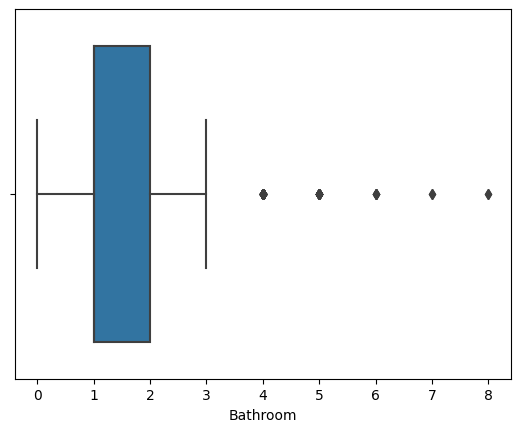

In [31]:
sns.boxplot(x=df_melbourne['Bathroom'])

In [32]:
#Quartile
Q1 = df_melbourne['Bathroom'].quantile(0.25)
Q3 = df_melbourne['Bathroom'].quantile(0.75)
print('Q1 = ', Q1)
print('Q3 = ', Q3)
#IQR
IQR = Q3 - Q1
print('IQR = ', IQR)

#Lower limit dan upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower Limit = ', lower_limit)
print('Upper Limit = ', upper_limit)


Q1 =  1.0
Q3 =  2.0
IQR =  1.0
Lower Limit =  -0.5
Upper Limit =  3.5


In [33]:
#Check the data that are considered outliers
df_outlier = df_melbourne[(df_melbourne['Bathroom'] < lower_limit) | (df_melbourne['Bathroom'] > upper_limit )]
df_outlier

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,RegionName,PropertyCount
124,Alphington,83 Fulham Rd,5,h,2840000.0,S,NELSON,12/06/2016,6.4,3078.0,5.0,4.0,4.0,809.0,-37.77500,145.02680,Northern Metropolitan,2211.0
379,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,HOCKINGSTUART,10/09/2016,11.0,3147.0,9.0,7.0,4.0,1472.0,-37.87290,145.07880,Southern Metropolitan,3052.0
388,Ashburton,29A Yuile St,5,h,3510000.0,S,JELLIS,18/03/2017,11.0,3147.0,5.0,5.0,2.0,755.0,-37.85980,145.07960,Southern Metropolitan,3052.0
392,Ashburton,15 Comas Gr,5,h,2752000.0,S,JELLIS,22/08/2016,11.0,3147.0,6.0,4.0,2.0,1075.0,-37.87140,145.07300,Southern Metropolitan,3052.0
446,Avondale Heights,6 Lovett Dr,4,h,1200000.0,S,NELSON,4/06/2016,10.5,3034.0,4.0,5.0,4.0,673.0,-37.75450,144.87360,Western Metropolitan,4502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12969,Essendon,83 Nimmo St,4,h,1600000.0,S,NELSON,19/08/2017,7.5,3040.0,4.0,4.0,3.0,543.0,-37.74633,144.89644,Western Metropolitan,9264.0
12994,Hampton,39 Crisp St,5,h,2500000.0,S,HOCKINGSTUART,19/08/2017,13.8,3188.0,5.0,4.0,2.0,627.0,-37.94109,145.00648,Southern Metropolitan,5454.0
13087,Aberfeldie,10 Caroline St,5,h,1830000.0,S,RENDINA,23/09/2017,7.5,3040.0,5.0,4.0,4.0,730.0,-37.75950,144.89427,Western Metropolitan,1543.0
13101,Balwyn,12 Belmore Rd,5,h,2580000.0,PI,MARSHALL,23/09/2017,7.9,3103.0,5.0,5.0,2.0,621.0,-37.80199,145.06486,Southern Metropolitan,5682.0


> We chose not to handle outliers because there were too many outliers found. This could be due to several factors, such as significant variability in the data or the presence of unusual or extreme data points that actually reflect real situations. In situations like this, removing all outliers can eliminate important information or alter the true characteristics of the data. Therefore, considering these aspects, we have chosen to retain the outliers in this analysis to ensure a more complete accuracy and integrity of the data.

## Descriptive Analysis

In [35]:
#dataset info
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Address        13518 non-null  object 
 2   Rooms          13518 non-null  int64  
 3   Type           13518 non-null  object 
 4   Price          13518 non-null  float64
 5   Method         13518 non-null  object 
 6   SellerG        13518 non-null  object 
 7   Date           13518 non-null  object 
 8   Distance       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Bedroom2       13518 non-null  float64
 11  Bathroom       13518 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13518 non-null  float64
 14  Lattitude      13518 non-null  float64
 15  Longtitude     13518 non-null  float64
 16  RegionName     13518 non-null  object 
 17  PropertyCount  13518 non-null  float64
dtypes: flo

In [36]:
df_melbourne['Suburb'].value_counts()

Reservoir         359
Richmond          259
Bentleigh East    249
Preston           239
Brunswick         221
                 ... 
Sandhurst           1
Bullengarook        1
Montrose            1
Croydon South       1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

In [37]:
df_melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,PropertyCount
count,13518.000000,1.351800e+04,13518.000000,13518.000000,13518.000000,13518.00000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,10.157827,3105.227401,2.916408,1.53536,1.610075,558.110593,-37.809191,144.995306,7455.482986
std,0.956438,6.398586e+05,5.861593,90.724572,0.966692,0.69231,0.962634,3998.194560,0.079366,0.104003,4381.437721
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.00000,1.000000,178.000000,-37.857000,144.929425,4380.000000
50%,3.000000,9.010000e+05,9.200000,3084.000000,3.000000,1.00000,2.000000,442.500000,-37.802300,145.000300,6567.000000
75%,3.000000,1.328000e+06,13.000000,3148.000000,3.000000,2.00000,2.000000,651.000000,-37.756203,145.058600,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.00000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


In [38]:
df_melbourne.describe(include='object').T

,count,unique,top,freq
Suburb,13518,314,Reservoir,359
Address,13518,13318,14 Arthur St,3
Type,13518,3,h,9389
Method,13518,5,S,8988
SellerG,13518,265,NELSON,1558
Date,13518,58,27/05/2017,473
RegionName,13518,8,Southern Metropolitan,4668


<ipython-input-39-3187d6373b78>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_melbourne.corr(), annot=True, cmap='coolwarm');


Text(0.5, 1.0, 'Correlation of features')

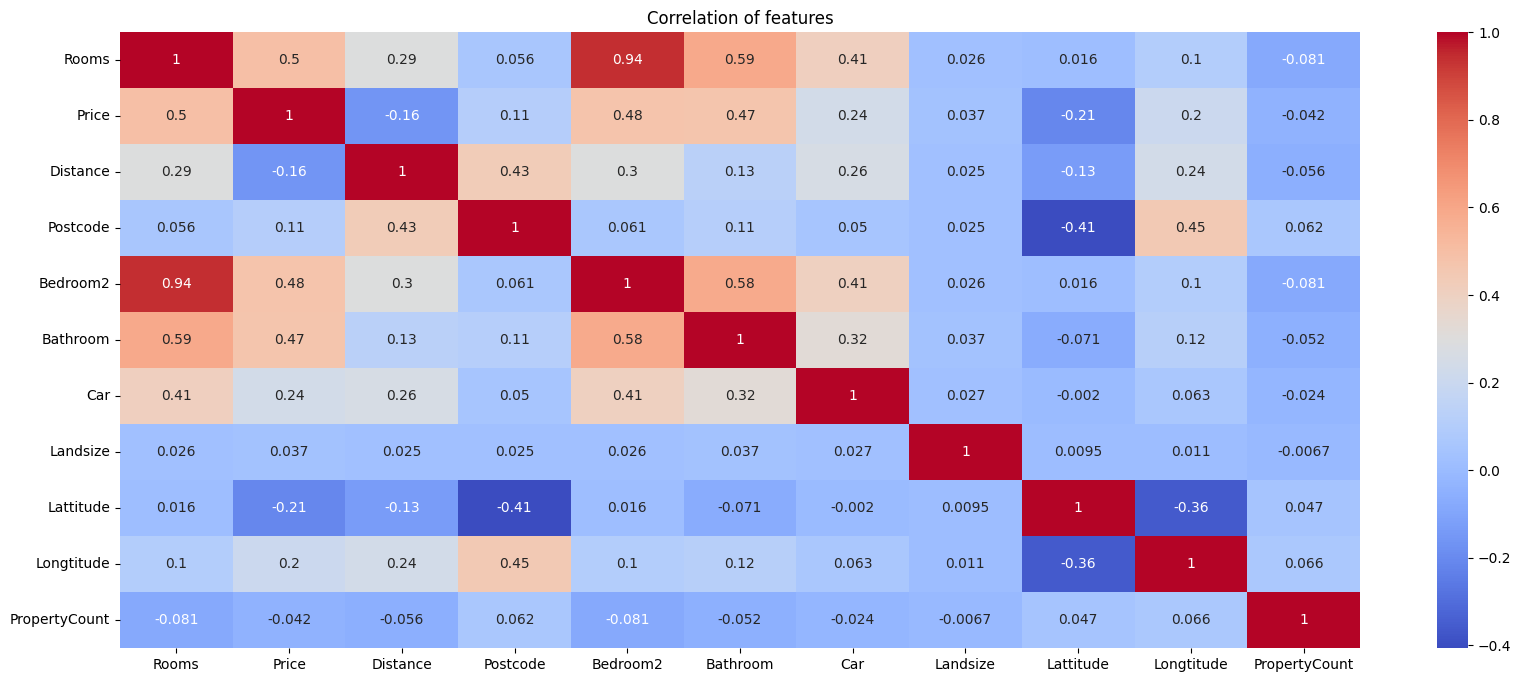

In [39]:
# Correlation with Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(data=df_melbourne.corr(), annot=True, cmap='coolwarm');
plt.title('Correlation of features')

<Axes: title={'center': 'Number of Houses per Region'}>

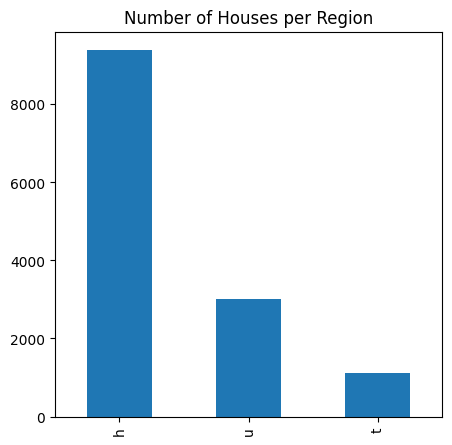

In [40]:
#Type Wise Number of Houses
types = df_melbourne['Type'].value_counts()

types.plot.bar(figsize =(5, 5), title = "Number of Houses per Region")

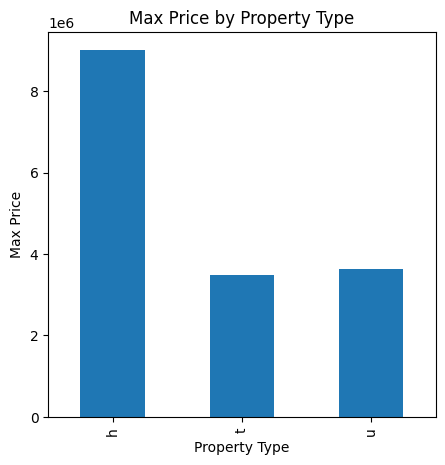

In [43]:
# Max Price by Property Type
max_prices = df_melbourne.groupby('Type')['Price'].max()
max_prices.plot.bar(figsize=(5, 5), title="Max Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Max Price")

# show plot
plt.show()

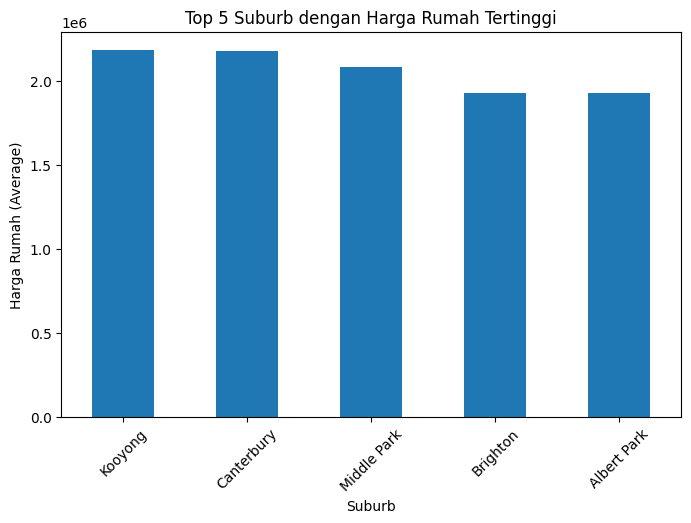

In [45]:
# Suburb with Highest Price
suburb_prices = df_melbourne.groupby('Suburb')['Price'].mean().nlargest(5)

# Membuat bar plot
plt.figure(figsize=(8, 5))
suburb_prices.plot(kind='bar')
plt.title('Top 5 Suburb dengan Harga Rumah Tertinggi')
plt.xlabel('Suburb')
plt.ylabel('Harga Rumah (Average)')
plt.xticks(rotation=45)
plt.show()

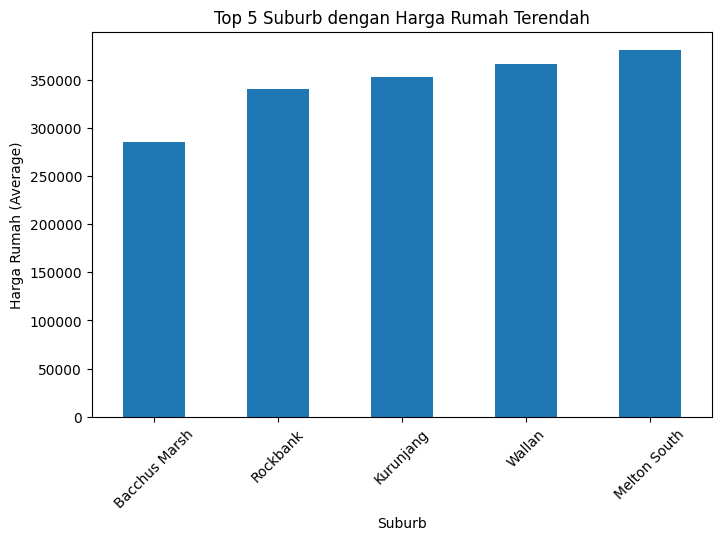

In [47]:
# Suburb with Lowest Price
suburb_prices = df_melbourne.groupby('Suburb')['Price'].mean().nsmallest(5)

# Membuat bar plot
plt.figure(figsize=(8, 5))
suburb_prices.plot(kind='bar')
plt.title('Top 5 Suburb dengan Harga Rumah Terendah')
plt.xlabel('Suburb')
plt.ylabel('Harga Rumah (Average)')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Top Real Estate Agents\n(Number of Deals Done)'}>

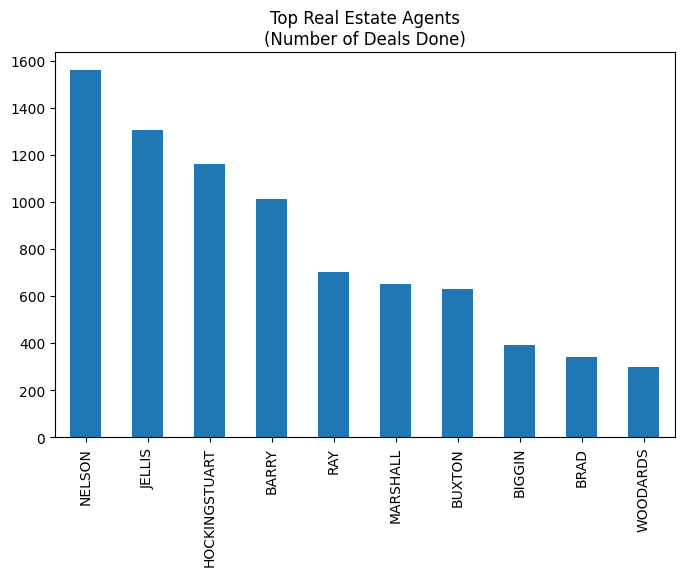

In [50]:
## Total Deals by Real estate agent
REA = df_melbourne['SellerG'].value_counts()

REA.head(n=10).plot.bar(figsize =(8, 5), title = "Top Real Estate Agents\n(Number of Deals Done)")

## Summary

Here is a summary of the results of the descriptive analysis and processing of the Melbourne House Market dataset:

Descriptive Analysis:
1. Key Findings:
   - There is a positive correlation between 'Rooms' and 'Price'.
   - The average house price overall is 1.07 million Australian Dollars.
   - The most common house type is 'h(house)', followed by 'u(unit)' and 't(townhouse)'.
   - The suburb with the highest price per square meter is Koyong, with an average of over 2 million Australian Dollars.
   - The suburb with the lowest price per square meter is Bacchus Marsh, with an average of less than 250000 Australian Dollars.
   - The real estate agent with the highest number of deals is Nelson, with over 1400 deals.

2. Challenges and Handling:
   - The challenge in this analysis is the presence of missing values in the dataset. To address this, for columns with a significant number of missing values, we dropped those columns (considering that those columns are not needed for analysis and visualization). For columns with missing values less than 100, we removed the corresponding rows, considering that the proportion of rows with null values is very small compared to the total number of rows in the data. The reason for not imputing the missing values is to maintain the authenticity of the data and provide accurate conclusions by preserving the integrity of the dataset.
   - Additionally, there are outliers in the dataset that may affect the analysis results, and we chose to leave them as they are in line with our principle of minimizing data manipulation. However, we still present the findings of the outliers as considerations for better data interpretation.

Insights or Potential Observations:
- Based on this analysis, it can be observed that the price per square meter has a positive correlation with the number of rooms. This suggests that the more rooms a house has, the higher the price per square meter.
- Suburbs with the highest price per square meter can be attractive areas for property investment, while suburbs with the lowest price per square meter can be more affordable options.
- Further analysis can be conducted to explore other factors influencing property prices in Melbourne, such as location, amenities, or population density.

# Export the Cleaned Data

In [48]:
# Export dataframe to CSV file
df_melbourne.to_csv('Melbourne_Housing_new.csv')